# Data from phase space covering
Generate learning data (Euler truncation errors) from random points on the phase space of the stiff Van der Pol equation.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import h5py

In [7]:
mu = 10
def vdp( t, x):
    y = np.empty(x.shape)
    y[0] = -mu*(x[1]*x[1]-1)*x[0]-x[1]
    y[1] = x[0]
    return y

end = 200
t = np.random.rand(10000)*end
t = np.sort(t)
sol = scipy.integrate.solve_ivp(vdp, [0, end], [1,1], t_eval=t, rtol=1e-10, atol=1e-10, method="Radau")

dydt = vdp(t, sol.y) 

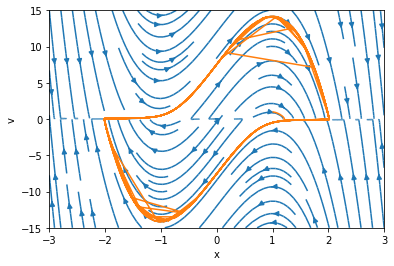

In [8]:
X,Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-15, 15, 100))
DX = Y
DY = -mu*(X*X-1)*Y-X
plt.figure(num="PhaseSpace")
plt.streamplot(X, Y, DX, DY)
plt.plot(sol.y[1],sol.y[0])
plt.xlabel("x")
plt.ylabel("v")
plt.show()

## Generate data

In [9]:
#this cell takes some time to run
np.random.seed(42) #fix seed for reproducibility
no = int(1000000) #number of data to generate

y_all = np.empty([no, 5])
y = np.array([0.0, 0.0])
for i in range(no):
    if i%1e5==0:
        print(i)
    y[0] = np.random.rand() * 30 - 15
    y[1] = np.random.rand() * 6 - 3
    t    = 0 #np.random.rand()
    dt = math.pow(10, np.random.rand()*3.5 - 5)
    rec_dt2 = 1/(dt*dt)
    sol = scipy.integrate.solve_ivp(vdp, [t, t+dt], y, t_eval = [t, t+dt], rtol=1e-10, atol=1e-10)
    dydt = vdp(t, y)
    #y_all[i,0] = t
    y_all[i,0] = dt
    y_all[i,1] = y[0]
    y_all[i,2] = y[1]
    y_all[i,3] = rec_dt2*(sol.y[0,0] - y[0] - dt*dydt[0])
    y_all[i,4] = rec_dt2*(sol.y[1,0] - y[1] - dt*dydt[1])
print(y_all.shape)
y_all[-1,:]

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
(1000000, 5)


array([ 1.03048205e-05,  6.03585118e+00, -5.91940141e-01, -3.86239082e+06,
       -5.85730842e+05])

## Convert data and save in hdf5 format

In [10]:
path_to_hdf = 'data/data_mu10_ps_test.hdf5'

In [11]:
with h5py.File(path_to_hdf, 'a') as f:
    f.create_dataset(
        str('X'),
        data    = y_all[:,0:3],
        dtype   = np.float64,
        compression     = 'gzip',
        compression_opts= 8
        )
    f.create_dataset(
        str('Y'),
        data   = y_all[:,3:5],
        dtype  = np.float64,
        compression     = 'gzip',
        compression_opts= 8
        )


### Appendix: Plot data points in phase space

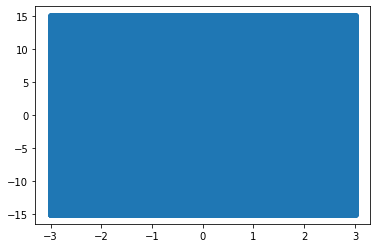

In [12]:
f = h5py.File(path_to_hdf, 'r+')
X = f['X']
plt.figure(num="pl1")
plt.scatter(X[:,2], X[:,1]) 
plt.show()

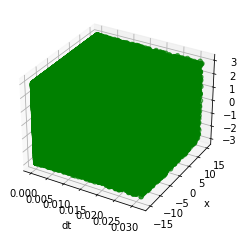

In [13]:
plt.figure(num="p123")
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
#plt.xscale('log')
#ax.view_init(0,60)
plt.xlabel("dt")
plt.ylabel("x")
plt.show()

In [14]:
f.close()